In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf 
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Flatten, Dropout
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
#Load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


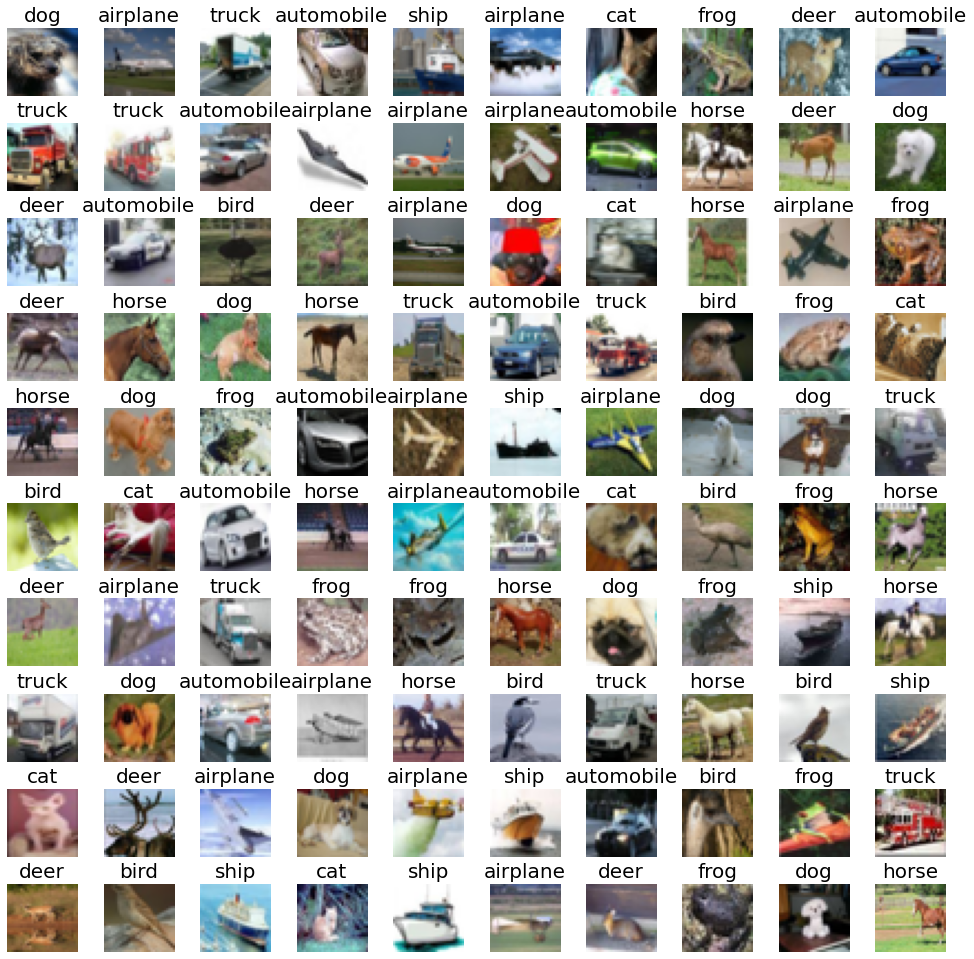

In [ ]:

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
# setting class names
class_names=[ "airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

fig, axes = plt.subplots(10, 10, figsize = (17,17))

axes = axes.ravel() 

n_train = len(X_train) 

for i in np.arange(0, 10 * 10):
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(class_names[label_index], fontsize = 20)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [ ]:
# set up image augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    )
datagen.fit(X_train)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


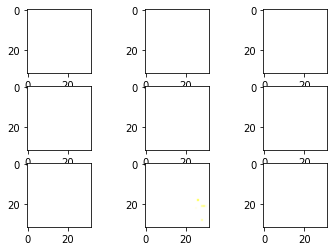

In [ ]:
# see example augmentation images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=10):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i])
    plt.show()
    break

In [ ]:
#scaling daa
X_train,X_test=X_train.astype('float32')/255,X_test.astype('float32')/255

In [ ]:
# one hot encode target values
Y_train = to_categorical(y_train)# i don't use this 
Y_test = to_categorical(y_test)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=None, input_shape=X_train.shape[1:],padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(32, (3, 3), activation='relu',kernel_regularizer=None,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Dropout(0))

model.add(Conv2D(2*32, (3, 3), activation='relu',kernel_regularizer=None,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(2*32, (3, 3), activation='relu',kernel_regularizer=None,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Dropout(0))

model.add(Conv2D(4*32, (3, 3), activation='relu',kernel_regularizer=None,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(4*32, (3, 3), activation='relu',kernel_regularizer=None,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Dropout(0))

model.add(Flatten())
model.add(Dense(512, activation='relu',kernel_regularizer=None))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [ ]:
# train with image augmentation
history=model.fit(datagen.flow(X_train, Y_train, batch_size=64),
                    steps_per_epoch = len(X_train) / 64, epochs=50, validation_data=(X_test, Y_test))

Epoch 1/50
781/781 [==============================] - 27s 35ms/step - loss: 0.9117 - accuracy: 0.6823 - val_loss: 1.0645 - val_accuracy: 0.6550
Epoch 2/50
781/781 [==============================] - 27s 35ms/step - loss: 0.7789 - accuracy: 0.7293 - val_loss: 0.9126 - val_accuracy: 0.7035
Epoch 3/50
781/781 [==============================] - 30s 38ms/step - loss: 0.7081 - accuracy: 0.7564 - val_loss: 0.6432 - val_accuracy: 0.7849
Epoch 4/50
781/781 [==============================] - 27s 35ms/step - loss: 0.6519 - accuracy: 0.7752 - val_loss: 0.7154 - val_accuracy: 0.7618
Epoch 5/50
781/781 [==============================] - 28s 36ms/step - loss: 0.6048 - accuracy: 0.7907 - val_loss: 0.6064 - val_accuracy: 0.7970
Epoch 6/50
781/781 [==============================] - 27s 35ms/step - loss: 0.5738 - accuracy: 0.8027 - val_loss: 0.6263 - val_accuracy: 0.7932
Epoch 7/50
781/781 [==============================] - 27s 34ms/step - loss: 0.5398 - accuracy: 0.8132 - val_loss: 0.5925 - val_accuracy:

In [ ]:
loss_train,model_train_acc=model.evaluate(X_train,Y_train,batch_size=64)
model_train_acc

782/782 [==============================] - 4s 5ms/step - loss: 0.1450 - accuracy: 0.9498


0.9498000144958496

In [ ]:
loss_test,model_test_acc=model.evaluate(X_test,Y_test,batch_size=64)
model_test_acc

157/157 [==============================] - 1s 5ms/step - loss: 0.4010 - accuracy: 0.8797


0.8797000050544739

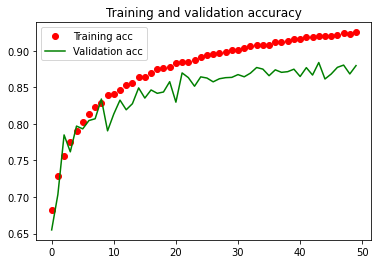

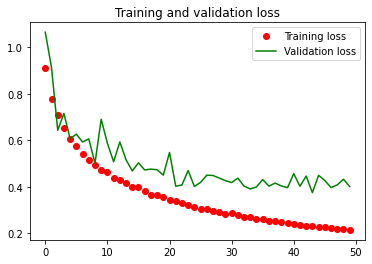

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']# training and validation
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Transfer Learning

In [ ]:
# get VGG16 base model and define new input shape
import keras
vgg16 = keras.applications.vgg16.VGG16(input_shape=(32, 32, 3),
                                       weights='imagenet',
                                       include_top=False)
# Extract the last layer from third block of vgg16 model
last = vgg16.get_layer('block3_pool').output

x = Flatten()(last)
x = Dense(1024, activation='relu')(x)

# x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
predictions =Dense(10, activation='softmax')(x)

# define and compile model
model2 = keras.Model(inputs=vgg16.inputs, outputs=predictions)


for layer in vgg16.layers:
    layer.trainable = False


model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model2.fit(X_train, Y_train,
          batch_size=64,
          epochs=50,
          validation_data=(X_test, Y_test))



Epoch 1/50
782/782 [==============================] - 8s 10ms/step - loss: 3.1206 - accuracy: 0.1752 - val_loss: 1.9088 - val_accuracy: 0.2304
Epoch 2/50
782/782 [==============================] - 7s 9ms/step - loss: 1.5965 - accuracy: 0.4067 - val_loss: 1.1922 - val_accuracy: 0.5585
Epoch 3/50
782/782 [==============================] - 7s 9ms/step - loss: 1.1789 - accuracy: 0.5762 - val_loss: 0.9803 - val_accuracy: 0.6709
Epoch 4/50
782/782 [==============================] - 7s 9ms/step - loss: 1.0447 - accuracy: 0.6356 - val_loss: 0.8768 - val_accuracy: 0.6973
Epoch 5/50
782/782 [==============================] - 7s 9ms/step - loss: 0.9908 - accuracy: 0.6552 - val_loss: 0.8402 - val_accuracy: 0.7166
Epoch 6/50
782/782 [==============================] - 7s 10ms/step - loss: 0.9463 - accuracy: 0.6759 - val_loss: 0.8211 - val_accuracy: 0.7237
Epoch 7/50
782/782 [==============================] - 7s 9ms/step - loss: 0.9170 - accuracy: 0.6852 - val_loss: 0.7964 - val_accuracy: 0.7284
Epoc

In [ ]:
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [ ]:
loss_test,model_test_acc=model2.evaluate(X_test,Y_test,batch_size=64)
model_test_acc

157/157 [==============================] - 1s 8ms/step - loss: 0.7084 - accuracy: 0.7898


0.7897999882698059

In [ ]:
loss_train,model_train_acc=model2.evaluate(X_train,Y_train,batch_size=64)
model_train_acc

782/782 [==============================] - 6s 7ms/step - loss: 0.3013 - accuracy: 0.9011


0.9010999798774719